# **Week 4: Deployment on Flask**
by - Suyog Nemade

**1-Building Model and Save**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
house_data_pre_pre=pd.read_csv('USA_Housing.csv')

**1.1-Investigation of datasets**

In [ ]:
house_data_pre_pre.head()

,Area_Income,Area_House_Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
house_data_pre_pre.rename(columns = {'Avg. Area Income':'Area_Income'}, inplace = True)
house_data_pre_pre.rename(columns = {'Avg. Area House Age':'Area_House_Age'}, inplace = True)
house_data_pre_pre.rename(columns = {'Avg. Area Number of Rooms':'Area_Number_Rooms'}, inplace = True)
house_data_pre_pre.rename(columns = {'Avg. Area Number of Bedrooms':'Area_Number_Bedrooms'}, inplace = True)
house_data_pre_pre.rename(columns = {'Area Population':'Area_Populations'}, inplace = True)

In [ ]:
house_data_pre_pre.head()

,Area_Income,Area_House_Age,Area_Number_Rooms,Area_Number_Bedrooms,Area_Populations,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
house_data_pre_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area_Income           5000 non-null   float64
 1   Area_House_Age        5000 non-null   float64
 2   Area_Number_Rooms     5000 non-null   float64
 3   Area_Number_Bedrooms  5000 non-null   float64
 4   Area_Populations      5000 non-null   float64
 5   Price                 5000 non-null   float64
 6   Address               5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
house_data_pre_pre.isnull().sum()

,0
Area_Income,0
Area_House_Age,0
Area_Number_Rooms,0
Area_Number_Bedrooms,0
Area_Populations,0
Price,0
Address,0


In [ ]:
house_data_pre_pre=house_data_pre_pre.drop(['Address'], axis=1)
house_data_pre_pre.head()

,Area_Income,Area_House_Age,Area_Number_Rooms,Area_Number_Bedrooms,Area_Populations,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [ ]:
house_data_pre_pre.shape

(5000, 6)

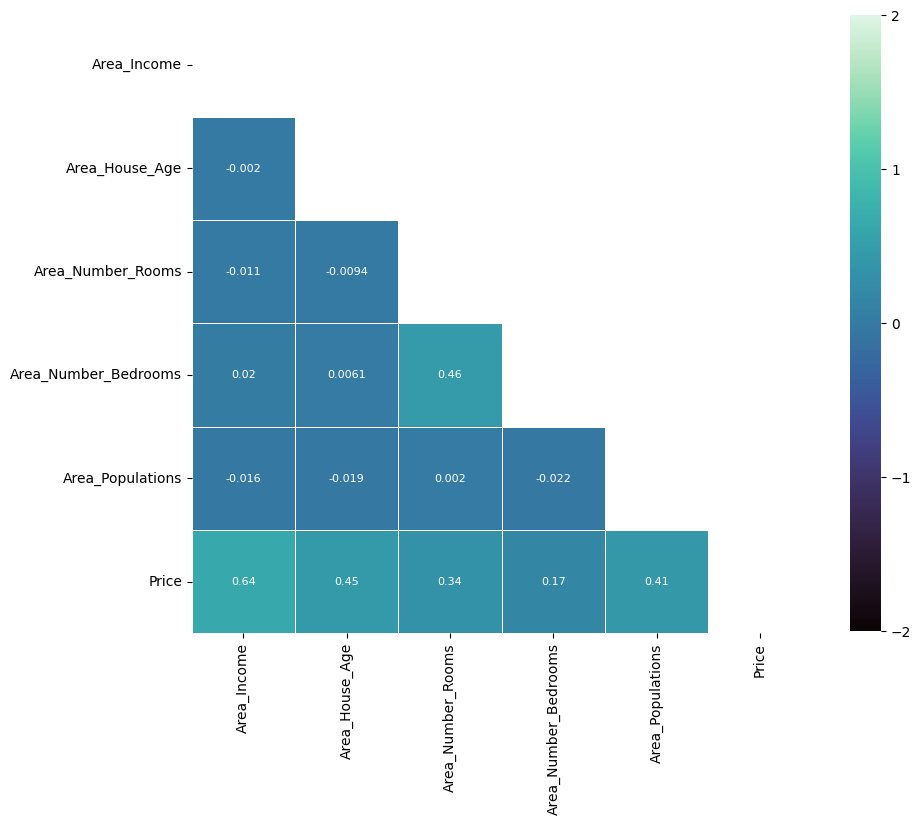

In [ ]:
# Plotting heatmap
corr=house_data_pre_pre.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(corr, mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "mako",
                      cbar_kws = {'shrink': .8,
                                "ticks" : [-2, -1, 0, 1, 2]},
                      vmin = -2,
                      vmax = 2,
                      annot = True,
                      annot_kws = {"size":8})
# Add the column names as labels
ax.set_yticklabels(corr.columns)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});

**1.2-Build Model**

In [ ]:
from sklearn.model_selection import train_test_split
#Split data into train and test sets
x = house_data_pre_pre.drop(['Price'],axis=1)
y = house_data_pre_pre['Price']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, train_size=0.70,test_size=0.30, random_state=0)
print(X_train.shape, X_test.shape)

(3500, 5) (1500, 5)


In [ ]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

model_RFR=RandomForestRegressor(n_estimators = 1000, random_state = 42)
model_RFR.fit(X_train,y_train)
y_pred=model_RFR.predict(X_test)

print('R2 Value:',metrics.r2_score(y_test, model_RFR.predict(X_test)))
print('Accuracy',100- (np.mean(np.abs((y_test - y_pred ) / y_test)) * 100))
pd.Series(model_RFR.feature_importances_, index=x.columns).sort_values(ascending=False)

R2 Value: 0.888424780124613
Accuracy 90.40888727311193


,0
Area_Income,0.428232
Area_House_Age,0.237280
Area_Populations,0.188185
Area_Number_Rooms,0.128525
Area_Number_Bedrooms,0.017778


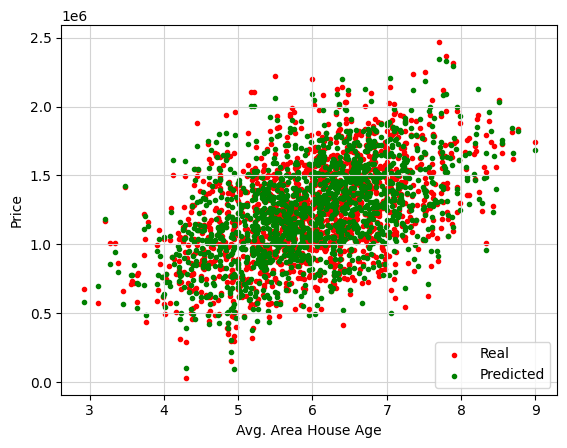

In [ ]:
# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.Area_House_Age

# Build scatterplot
plt.scatter(x_axis, y_test, color = 'red', marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, color = 'green',marker = '.',label = 'Predicted')
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.grid(color ='#D3D3D3')
plt.legend(loc ='lower right')
plt.show()

In [ ]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# R-squared scores
r2 = r2_score(y_test.values,y_pred)
# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 95982.06
Mean Squared Error: 14431051360.91
R-squared scores: 0.89


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

pd.Series(model.coef_, index=x.columns).sort_values(ascending=False)

Model Coefficients: [2.16187374e+01 1.66145180e+05 1.21010577e+05 1.76003780e+03
 1.51647974e+01]
Mean Absolute Error: 81563.14733994487
Coefficient of Determination: 0.9200757649412041


,0
Area_House_Age,166145.179949
Area_Number_Rooms,121010.576873
Area_Number_Bedrooms,1760.037796
Area_Income,21.618737
Area_Populations,15.164797


In [ ]:
# Make prediction
import warnings
warnings.filterwarnings('ignore')

predict = model.predict(X_test)
result = X_test
result['Price'] = y_test
result['Predic_Price'] = predict.tolist()
result.head()

,Area_Income,Area_House_Age,Area_Number_Rooms,Area_Number_Bedrooms,Area_Populations,Price,Predic_Price
398,61200.726175,5.299694,6.234615,4.23,42789.692217,894251.068636,969608.346806
3833,63380.814670,5.344664,6.001574,2.45,40217.333577,932979.360621,953868.155486
4836,71208.269301,5.300326,6.077989,4.01,25696.361741,920747.911288,907506.328361
4572,50343.763518,6.027468,5.160240,4.35,27445.876739,691854.921027,493325.260323
636,54535.453719,5.278065,6.871038,4.41,30852.207006,732733.236293,718221.210115


**1.3- Save Model**

In [ ]:
import pickle

In [ ]:
#Save model
pickle.dump(model, open('model.pkl', 'wb'))

# **2-Deploying The Model on Flask (Web App)**

In [ ]:
!pip install flask --quiet
!pip install flask-ngrok --quiet

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz

--2023-05-28 16:55:13--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13856790 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz’

ngrok-stable-linux- 100%[===================>]  13.21M  12.8MB/s    in 1.0s    

2023-05-28 16:55:15 (12.8 MB/s) - ‘ngrok-stable-linux-amd64.tgz’ saved [13856790/13856790]



In [ ]:
!tar -xvf /content/ngrok-stable-linux-amd64.tgz

ngrok


In [ ]:
!./ngrok authtoken 23H0IY10fqeKMIW7kG05JhKZMae_3Zabr2iqkU9AUcZ7CrRTP

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from flask import Flask, request, render_template
import numpy as np
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl', 'rb'))

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/', methods=['POST'])
def predict():
    int_features = [float(x) for x in request.form.values()]
    features = [np.array(int_features)]
    prediction = model.predict(features)
    output = round(prediction[0], 2)

    if output < 0:
        return render_template('index.html', prediction_text="Values entered are not reasonable.")
    else:
        return render_template('index.html', prediction_text='Predicted Price of the house is: ${}'.format(output))

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
!mkdir templates -p

In [ ]:
#css code
%%writefile templates/index.html

<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <title>House Price Predictor</title>
    <style>
        /* Base styles */
        * {
            font-family: 'Arial', sans-serif;
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }

        body {
            background: linear-gradient(135deg, #4d79ff, #33ccff);
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh;
        }

        /* Card container */
        .card {
            background-color: #ffffff;
            width: 420px;
            padding: 40px;
            border-radius: 15px;
            box-shadow: 0 10px 20px rgba(0, 0, 0, 0.15);
            animation: fadeIn 1s ease-in-out;
            text-align: center;
        }

        /* Header styles */
        .card-header {
            display: flex;
            flex-direction: column;
            align-items: center;
            gap: 10px;
        }

        .card-header img {
            width: 60px;
            height: 60px;
        }

        .card-header h1 {
            color: #333;
            font-size: 1.8em;
            margin-top: 10px;
        }

        /* Form styles */
        form {
            display: flex;
            flex-direction: column;
            gap: 15px;
            margin-top: 20px;
        }

        label {
            font-size: 0.9em;
            color: #333;
            font-weight: bold;
            text-align: left;
        }

        input[type="text"] {
            padding: 12px;
            border: 1px solid #ddd;
            border-radius: 8px;
            outline: none;
            transition: border-color 0.3s;
        }

        input[type="text"]:focus {
            border-color: #4d79ff;
            box-shadow: 0 0 8px rgba(77, 121, 255, 0.3);
        }

        button {
            padding: 12px;
            font-size: 1em;
            color: white;
            background-color: #4d79ff;
            border: none;
            border-radius: 8px;
            cursor: pointer;
            transition: background-color 0.3s;
            font-weight: bold;
        }

        button:hover {
            background-color: #3359cc;
        }

        .result {
            text-align: center;
            margin-top: 20px;
            font-weight: bold;
            color: #333;
            background-color: #e6f2ff;
            padding: 10px;
            border-radius: 8px;
            box-shadow: 0 5px 10px rgba(0, 0, 0, 0.1);
        }

        /* Animations */
        @keyframes fadeIn {
            0% {
                opacity: 0;
                transform: translateY(10px);
            }
            100% {
                opacity: 1;
                transform: translateY(0);
            }
        }

    </style>
</head>

<body>
    <div class="card">
        <!-- Card header with logo and title -->
        <div class="card-header">
            <img src="https://seeklogo.com/images/H/HOUSE_M_D_-logo-74D2723197-seeklogo.com.png" alt="House Logo">
            <h1>House Price Predictor</h1>
        </div>

        <form action="{{ url_for('predict') }}" method="post" class="info">
            <label for="income">Average Area Income</label>
            <input type="text" id="income" name="Average Income of Area" required />

            <label for="age">Average House Age</label>
            <input type="text" id="age" name="Average House Age" required />

            <label for="rooms">Average Number of Rooms</label>
            <input type="text" id="rooms" name="Average Number of Rooms" required />

            <label for="bedrooms">Average Number of Bedrooms</label>
            <input type="text" id="bedrooms" name="Average Number of Bedrooms" required />

            <label for="population">Average Area Population</label>
            <input type="text" id="population" name="Average Area Population" required />

            <button type="submit">Predict</button>
        </form>

        <!-- Placeholder for prediction output -->
        <div class="result">
            <p><b>{{ prediction_text }}</b></p>
        </div>
    </div>
</body>

</html>

Writing templates/index.html
